In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#We are going to cluster our customers based on Annual Income and Spending Scores
X = dataset.iloc[:, [3, 4]].values

#### We shall consider Agglomerative (Bottom Up) Approach for Hierarchical Clustering. 

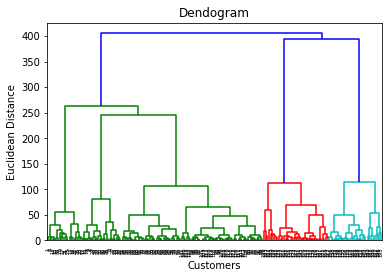

In [5]:
# Using the dendrogram to find the optimal number of clusters. Dendogram works as memory capturing measure of 
# dissimilarity between clusters.
import scipy.cluster.hierarchy as sch
dendogram = sch.dendrogram(sch.linkage(X, method ='ward')) # Ward is for minimizing within-cluster variance
plt.title('Dendogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()

#### For Threshold in dendogram we consider the longest vertical line that doesn't cross any extended horizontal line.
#### Here following this process, it gives us 5 clusters.

In [8]:
# Fitting Hierarchical Clustering to the dataset, using euclidean distance linkage 
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage= 'ward')
y_hc = hc.fit_predict(X)

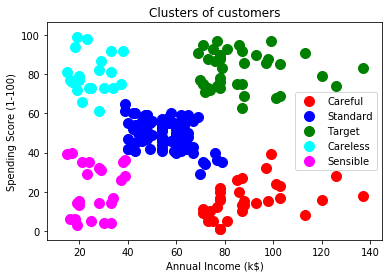

In [11]:
#Visualising the clusters
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s=100, c= 'red', label= 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()